In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('To_Use_data.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34,37,20.879744,82.002744,6.502985,202.935536,rice
1,78,21,20,21.770462,80.319644,7.038096,226.655537,rice
2,92,31,34,23.004459,82.320763,7.840207,263.964248,rice
3,98,38,45,26.491096,80.158363,6.980401,242.864034,rice
4,79,53,43,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df.shape

(2200, 8)

In [5]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
labels_map = {labels[i]:i+1 for i in range(len(labels))}
labels_map

{'rice': 1,
 'maize': 2,
 'chickpea': 3,
 'kidneybeans': 4,
 'pigeonpeas': 5,
 'mothbeans': 6,
 'mungbean': 7,
 'blackgram': 8,
 'lentil': 9,
 'pomegranate': 10,
 'banana': 11,
 'mango': 12,
 'grapes': 13,
 'watermelon': 14,
 'muskmelon': 15,
 'apple': 16,
 'orange': 17,
 'papaya': 18,
 'coconut': 19,
 'cotton': 20,
 'jute': 21,
 'coffee': 22}

In [8]:
dummm = df.copy()
df['label'] = df['label'].map(labels_map)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34,37,20.879744,82.002744,6.502985,202.935536,1
1,78,21,20,21.770462,80.319644,7.038096,226.655537,1
2,92,31,34,23.004459,82.320763,7.840207,263.964248,1
3,98,38,45,26.491096,80.158363,6.980401,242.864034,1
4,79,53,43,20.130175,81.604873,7.628473,262.717340,1


## Outlier Removal

### First Lets detect the outliers as shown ↓

**We will be using the gaussian trainsformation technique which says if there are datapoints greater than "mean+{num} * std",then there is a possibilty that that particular datapoint will not fit in the gaussian distribution,so here i have choosen the num as 3,so my range is {lower,upper} = {mean-{3} * std,mean+{3} * std},if there are any datapoints beyond these ranges,then they must be removed,so we find there are couple of data points of that,inorder to remove these outilers,we will be using another method of `Quantiles` which is `Inter Quantile Range` which is a better approach!**

In [9]:
temp = df.copy()

In [10]:
upper_list = []
lower_list = []

for i in temp.columns[:-1]:
    upper_list.append(df[i].mean()+(df[i].std())*3)
    lower_list.append(df[i].mean()-(df[i].std())*3)
    

In [11]:
j = 0
for i in temp.columns[:-1]:
    dummy = temp[(temp[i]>upper_list[j])|(temp[i]<lower_list[j])];j+=1

In [12]:
dummy

,N,P,K,temperature,humidity,ph,rainfall,label
6,75,23,28,22.708838,82.639414,5.700806,271.324860,1
12,86,52,48,26.800796,80.886848,5.108682,284.436457,1
16,61,46,51,21.587118,82.788371,6.249051,276.655246,1
19,100,46,34,23.579436,83.587603,5.853932,291.298662,1
26,96,32,31,26.359272,84.044036,6.286500,271.358614,1
30,68,34,49,21.446540,84.943760,5.824709,272.201720,1
33,94,25,30,20.267076,81.638952,5.014507,270.441727,1
36,78,23,40,26.757542,81.177340,5.960370,272.299906,1
37,74,42,29,23.863305,83.152508,5.561399,285.249365,1
38,68,60,49,21.019447,82.952217,7.416245,298.401847,1


**Now we have to see which all values Are not properly normally distributed,well there are few like `N,humidity,rainfall`,as we can observe from the Q-Q plot,they're not that correctly fitted,lets try to fix them a bit**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [14]:
temp.head(2)

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34,37,20.879744,82.002744,6.502985,202.935536,1
1,78,21,20,21.770462,80.319644,7.038096,226.655537,1


In [15]:
test = temp['label']
train = temp.drop(['label'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size = 0.2)

In [16]:
mm = MinMaxScaler()
X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.fit_transform(X_test)

### ML ALGO 

In [17]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn import tree

In [18]:
X_train_df = pd.DataFrame(X_train_scaled,columns=train.columns)
X_train_df.head()

,N,P,K,temperature,humidity,ph,rainfall
0,0.264286,0.329032,0.217391,0.482163,0.570332,0.479021,0.090893
1,0.857143,0.232258,0.339130,0.511128,0.821678,0.417468,0.101057
2,0.214286,0.393548,0.078261,0.476315,0.454515,0.158449,0.093398
3,0.685714,0.270968,0.060870,0.278321,0.638907,0.352812,0.244045
4,0.571429,0.283871,0.134783,0.446478,0.588721,0.579986,0.357385


In [19]:
X_train_scaled

array([[0.26428571, 0.32903226, 0.2173913 , ..., 0.57033213, 0.47902113,
        0.09089299],
       [0.85714286, 0.23225806, 0.33913043, ..., 0.82167845, 0.41746817,
        0.10105669],
       [0.21428571, 0.39354839, 0.07826087, ..., 0.4545152 , 0.1584494 ,
        0.09339812],
       ...,
       [0.59285714, 0.4516129 , 0.2826087 , ..., 0.86215339, 0.42030561,
        0.55860052],
       [0.17857143, 0.39354839, 0.16086957, ..., 0.28173862, 0.22419   ,
        0.4293354 ],
       [0.47857143, 0.47096774, 0.25652174, ..., 0.88955746, 0.53293754,
        0.19650384]])

[Text(0.3958333333333333, 0.9666666666666667, 'humidity <= 27.685\ngini = 0.954\nsamples = 1760\nvalue = [82, 78, 81, 86, 81, 78, 78, 81, 76, 82, 73, 78\n85, 80, 82, 81, 76, 87, 78, 81, 74, 82]'),
 Text(0.33630952380952384, 0.9, 'K <= 49.5\ngini = 0.5\nsamples = 167\nvalue = [0, 0, 81, 86, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.3125, 0.8333333333333334, 'gini = 0.0\nsamples = 86\nvalue = [0, 0, 0, 86, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.3601190476190476, 0.8333333333333334, 'gini = 0.0\nsamples = 81\nvalue = [0, 0, 81, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.45535714285714285, 0.9, 'K <= 125.0\ngini = 0.95\nsamples = 1593\nvalue = [82, 78, 0, 0, 81, 78, 78, 81, 76, 82, 73, 78\n85, 80, 82, 81, 76, 87, 78, 81, 74, 82]'),
 Text(0.40773809523809523, 0.8333333333333334, 'rainfall <= 30.849\ngini = 0.944\nsamples = 1427\nvalue = [82, 78, 0, 0, 81, 78, 78, 81, 76, 82, 73, 78\n0, 80, 82, 0, 76, 87, 78, 81, 74, 8

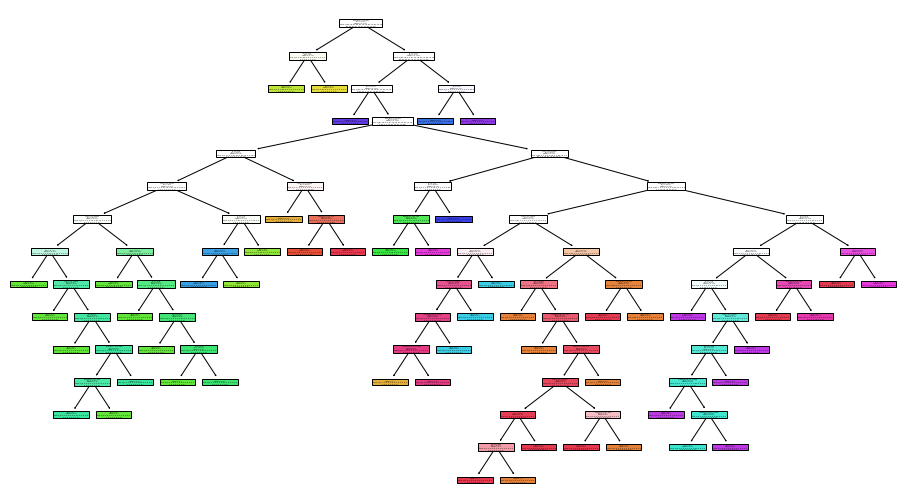

In [20]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns

In [21]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.        , 0.00055465, 0.0005608 , 0.00101912, 0.00112013,
       0.00112198, 0.00112251, 0.00112251, 0.00215803, 0.00219189,
       0.00221861, 0.00269608, 0.00313666, 0.00320905, 0.00454076,
       0.00477318, 0.00494548, 0.0050849 , 0.00633117, 0.00667388,
       0.00691288, 0.00916928, 0.00916928, 0.01200593, 0.01358902,
       0.02049354, 0.02645635, 0.02960828, 0.0312917 , 0.0342522 ,
       0.04114455, 0.04153277, 0.04243685, 0.04250662, 0.04384132,
       0.04650136, 0.04705153, 0.04734125])

In [22]:
alpha_list = []
for i in ccp_alpha:
    clf = DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    clf.fit(X_train,y_train)
    alpha_list.append(clf)


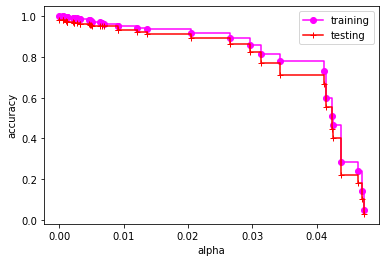

In [23]:
train_score = [clf.score(X_train,y_train) for clf in alpha_list]
test_score =  [clf.score(X_test,y_test) for clf in alpha_list]

plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,train_score,marker = 'o',label = 'training',color = 'magenta',drawstyle = 'steps-post')
plt.plot(ccp_alpha,test_score,marker = '+',label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

[Text(0.4090909090909091, 0.875, 'humidity <= 27.685\ngini = 0.954\nsamples = 1760\nvalue = [82, 78, 81, 86, 81, 78, 78, 81, 76, 82, 73, 78\n85, 80, 82, 81, 76, 87, 78, 81, 74, 82]'),
 Text(0.18181818181818182, 0.625, 'K <= 49.5\ngini = 0.5\nsamples = 167\nvalue = [0, 0, 81, 86, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.09090909090909091, 0.375, 'gini = 0.0\nsamples = 86\nvalue = [0, 0, 0, 86, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.2727272727272727, 0.375, 'gini = 0.0\nsamples = 81\nvalue = [0, 0, 81, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.6363636363636364, 0.625, 'K <= 125.0\ngini = 0.95\nsamples = 1593\nvalue = [82, 78, 0, 0, 81, 78, 78, 81, 76, 82, 73, 78\n85, 80, 82, 81, 76, 87, 78, 81, 74, 82]'),
 Text(0.45454545454545453, 0.375, 'rainfall <= 30.849\ngini = 0.944\nsamples = 1427\nvalue = [82, 78, 0, 0, 81, 78, 78, 81, 76, 82, 73, 78\n0, 80, 82, 0, 76, 87, 78, 81, 74, 82]'),
 Text(0.36363636363636365, 0.1

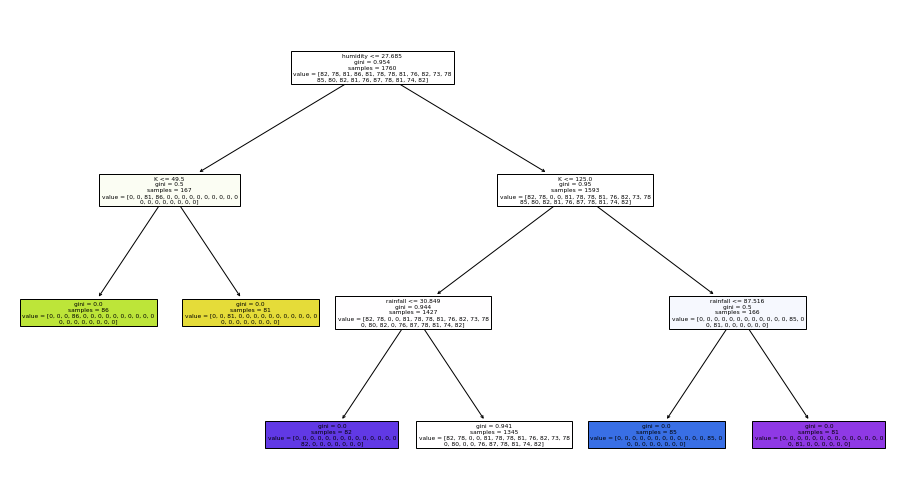

In [24]:
clf = DecisionTreeClassifier(random_state=0,ccp_alpha=0.045)
clf.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns)

In [25]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.030,0.035,0.040,0.045,0.050],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.030,0.035,0.040,0.045,0.050],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [26]:
scores = []
for model_name,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions= mp['params'],cv = 5,n_jobs=-1,n_iter = 10,scoring='accuracy',
                            verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got t

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=56).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [27]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_estimator','best_score'])
scores_df

,model_name,best_estimator,best_score
0,RandomForest,"(DecisionTreeClassifier(ccp_alpha=0.03, max_de...",0.923295
1,logistic,"LogisticRegression(max_iter=56, multi_class='m...",0.956818
2,D-tree,"DecisionTreeClassifier(ccp_alpha=0.05, criteri...",0.699432
3,SVM,"SVC(C=0.75, kernel='poly', max_iter=56, tol=1e...",0.947159


In [29]:
rf = RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=12,
                       min_samples_split=5, n_estimators=800)

lr = LogisticRegression(C=0.75, max_iter=194, multi_class='ovr', penalty='l1',
                   solver='liblinear')

svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)

rf_val = cross_val_score(estimator=rf,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)
lr_val = cross_val_score(estimator = lr,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)
svc_val = cross_val_score(estimator=svc,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)

 Model : rf gave 0.9164772727272726 accuracy
 Model : lr gave 0.9068181818181819 accuracy
 Model : svc gave 0.9744318181818181 accuracy


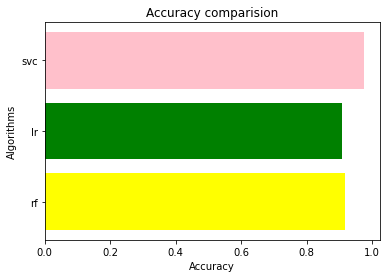

In [30]:

score_list = [rf_val,lr_val,svc_val]
model_name = ['rf','lr','svc']
x_axis=[]
for i,j in zip(score_list,model_name):
    x_axis.append(i.mean())
    print(f' Model : {j} gave {i.mean()} accuracy')
m=np.array(x_axis)
n=np.array(model_name)
plt.title("Accuracy comparision")
plt.xlabel("Accuracy")
plt.ylabel("Algorithms")
plt.barh(n,m,color=['yellow','green','pink'])
plt.show()

In [31]:
from sklearn import metrics

In [32]:
svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)
svc.fit(X_train_scaled,y_train)
svc.score(X_train_scaled,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=139).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.9852272727272727

In [33]:
rf = RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=12,
                       min_samples_split=5, n_estimators=800)

rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9181818181818182

In [34]:
svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)
svc.fit(X_train,y_train)
svc.score(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=139).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.9585227272727272

In [35]:
svc.score(X_test,y_test)

0.9522727272727273

In [36]:
train.shape,temp.shape

((2200, 7), (2200, 8))

In [39]:
original_labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
labels_map_new = {i+1:original_labels[i] for i in range(len(original_labels))}
labels_map_new

{1: 'rice',
 2: 'maize',
 3: 'chickpea',
 4: 'kidneybeans',
 5: 'pigeonpeas',
 6: 'mothbeans',
 7: 'mungbean',
 8: 'blackgram',
 9: 'lentil',
 10: 'pomegranate',
 11: 'banana',
 12: 'mango',
 13: 'grapes',
 14: 'watermelon',
 15: 'muskmelon',
 16: 'apple',
 17: 'orange',
 18: 'papaya',
 19: 'coconut',
 20: 'cotton',
 21: 'jute',
 22: 'coffee'}

In [41]:
# 21st label is jute!

data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = svc.predict(data)
pred = prediction[0]
print(labels_map_new[pred])


data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = svc.predict(data)
pred = prediction[0]
print(labels_map_new[pred])

jute
coffee


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## Saving the Model

In [42]:
import pickle
svm_model_pkl = open('crop_classification_model.pkl', 'wb')
pickle.dump(svc, svm_model_pkl)
svm_model_pkl.close()

In [43]:
file = open('cropmodel2.pkl','wb')
pickle.dump(svc,file)
file.close()